In [1]:
import torch
from diffusers import StableDiffusionPipeline
import os

def main():
    # 1. 기본 설정
    model_id = "CompVis/stable-diffusion-v1-4"
    lora_dir = "./runs/dreambooth_slipper_1000"
    output_dir = "outputs/generated_slipper_outputs"

    device = "cuda" if torch.cuda.is_available() else "cpu"
    dtype = torch.float16 if device == "cuda" else torch.float32

    # 출력 폴더 생성
    os.makedirs(output_dir, exist_ok=True)

    # 2. base Stable Diffusion 파이프라인 로드
    pipe = StableDiffusionPipeline.from_pretrained(
        model_id,
        torch_dtype=dtype,
    ).to(device)

    # 3. 학습한 LoRA 가중치 로드
    pipe.load_lora_weights(
        lora_dir,
        weight_name="pytorch_lora_weights.safetensors",
    )

    # 4. 10개의 다양한 프롬프트 리스트 (고양이 버전)
    prompts = [
        "A photo of sks indoor slipper in a jungle.",
        "A photo of sks indoor slipper on a wooden floor, view from the top.",
        "A close-up photo of sks indoor slipper under soft studio lighting.",
        "A photo of sks indoor slipper on a cozy carpet, view from a low angle.",
        "A photo of sks indoor slipper outdoors on grass, shallow depth of field.",
        "A photo of sks indoor slipper in a bathroom setting, view from the side.",
        "A photo of sks indoor slipper in the forest with natural daylight.",
        "A photo of sks indoor slipper on a desk, high-angle shot.",
        "A cinematic photo of sks indoor slipper on a dark surface, dramatic lighting.",
        "A photo of sks indoor slipper next to a bed in a bedroom, warm lighting."
    ]

    negative_prompt = ""  # 필요 없으면 빈 문자열

    # 5. 10장의 이미지 생성
    for idx, prompt in enumerate(prompts):
        print(f"Generating image {idx+1}/{len(prompts)} ... Prompt: {prompt}")

        with torch.autocast(device) if device == "cuda" else torch.no_grad():
            image = pipe(
                prompt=prompt,
                negative_prompt=negative_prompt,
                num_inference_steps=30,
                guidance_scale=7.5,
            ).images[0]

        # 6. 파일로 저장
        save_path = os.path.join(output_dir, f"sks_slipper_{idx+1}.png")
        image.save(save_path)
        print(f"Saved: {save_path}")

    print("Done! All slipper images have been generated.")


if __name__ == "__main__":
    main()


/home/reproducepark/anaconda3/envs/cs492d/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading pipeline components...:  57%|█████▋    | 4/7 [00:00<00:00,  6.23it/s]/home/reproducepark/anaconda3/envs/cs492d/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Loading pipeline components...: 100%|██████████| 7/7 [00:01<00:00,  4.70it/s]


Generating image 1/10 ... Prompt: A photo of sks indoor slipper in a jungle.


100%|██████████| 30/30 [00:01<00:00, 20.16it/s]


Saved: outputs/generated_slipper_outputs/sks_slipper_1.png
Generating image 2/10 ... Prompt: A photo of sks indoor slipper on a wooden floor, view from the top.


100%|██████████| 30/30 [00:01<00:00, 22.57it/s]


Saved: outputs/generated_slipper_outputs/sks_slipper_2.png
Generating image 3/10 ... Prompt: A close-up photo of sks indoor slipper under soft studio lighting.


100%|██████████| 30/30 [00:01<00:00, 23.16it/s]


Saved: outputs/generated_slipper_outputs/sks_slipper_3.png
Generating image 4/10 ... Prompt: A photo of sks indoor slipper on a cozy carpet, view from a low angle.


100%|██████████| 30/30 [00:01<00:00, 23.15it/s]


Saved: outputs/generated_slipper_outputs/sks_slipper_4.png
Generating image 5/10 ... Prompt: A photo of sks indoor slipper outdoors on grass, shallow depth of field.


100%|██████████| 30/30 [00:01<00:00, 23.33it/s]


Saved: outputs/generated_slipper_outputs/sks_slipper_5.png
Generating image 6/10 ... Prompt: A photo of sks indoor slipper in a bathroom setting, view from the side.


100%|██████████| 30/30 [00:01<00:00, 23.41it/s]


Saved: outputs/generated_slipper_outputs/sks_slipper_6.png
Generating image 7/10 ... Prompt: A photo of sks indoor slipper in the forest with natural daylight.


100%|██████████| 30/30 [00:01<00:00, 22.64it/s]


Saved: outputs/generated_slipper_outputs/sks_slipper_7.png
Generating image 8/10 ... Prompt: A photo of sks indoor slipper on a desk, high-angle shot.


100%|██████████| 30/30 [00:01<00:00, 23.29it/s]


Saved: outputs/generated_slipper_outputs/sks_slipper_8.png
Generating image 9/10 ... Prompt: A cinematic photo of sks indoor slipper on a dark surface, dramatic lighting.


100%|██████████| 30/30 [00:01<00:00, 23.21it/s]


Saved: outputs/generated_slipper_outputs/sks_slipper_9.png
Generating image 10/10 ... Prompt: A photo of sks indoor slipper next to a bed in a bedroom, warm lighting.


100%|██████████| 30/30 [00:01<00:00, 23.23it/s]


Saved: outputs/generated_slipper_outputs/sks_slipper_10.png
Done! All slipper images have been generated.


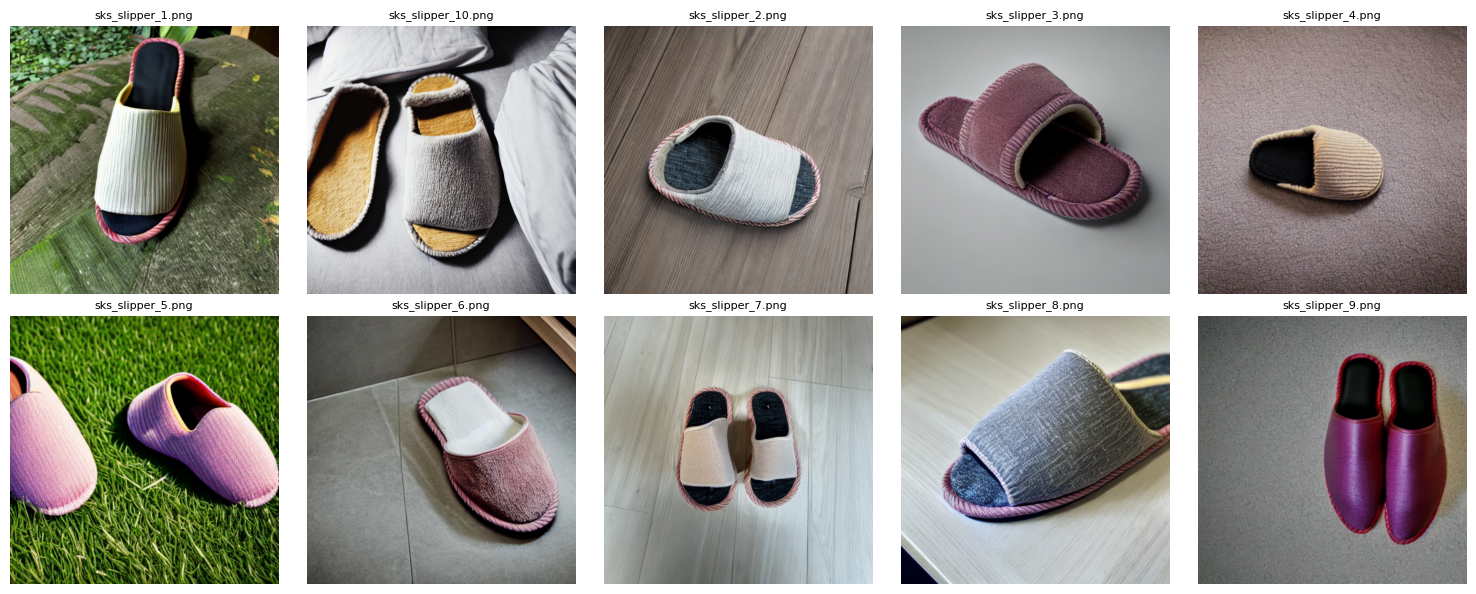

In [2]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# 저장된 10장의 고양이 이미지를 불러와서 시각화
output_dir = "outputs/generated_slipper_outputs"

# 폴더 안의 이미지 파일 목록 정렬 (최대 10장 사용)
image_files = sorted(
    [f for f in os.listdir(output_dir) if f.lower().endswith((".png", ".jpg", ".jpeg"))]
)[:10]

fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for ax, img_name in zip(axes.flatten(), image_files):
    img_path = os.path.join(output_dir, img_name)
    img = Image.open(img_path)
    ax.imshow(img)
    ax.set_title(img_name, fontsize=8)
    ax.axis("off")

plt.tight_layout()
plt.show()
